# Version T2
## Create at 2021/12/24
*  load h5 file
*  plot 1D curves
*  plot image
*  do line-cuts

# Load necessary python package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

In [2]:
%run -i /home/group/NSLSII_Data/User_Pipelines/Codes/user_v0.py

# Define IO

In [3]:
inDir = '/home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/HDF_Results/'
print('The input dir is: %s'%inDir)

The input dir is: /home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/HDF_Results/


In [4]:
outDir = '/home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/PostAnalys/'
create_fullpath(  outDir )

Directory  /home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/PostAnalys/  already exists


'/home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/PostAnalys/'

# Load data from hdf5

## Check the availabe data

In [5]:
fps = np.sort( ls_dir( inDir ) )
print(fps )
print( len(fps) )

['Seefat_S10_3M_PFIA_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
 'Seefat_S10_3M_PFIA_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.100.h5'
 'Seefat_S10_3M_PFIA_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.120.h5'
 'Seefat_S10_3M_PFIA_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.250.h5'
 'Seefat_S11_3M_PFIA_IL_on_silicon_wafer_100nmR_pos1_x-0.000_th0.050.h5'
 'Seefat_S11_3M_PFIA_IL_on_silicon_wafer_100nmR_pos1_x-0.000_th0.100.h5'
 'Seefat_S11_3M_PFIA_IL_on_silicon_wafer_100nmR_pos1_x-0.000_th0.120.h5'
 'Seefat_S11_3M_PFIA_IL_on_silicon_wafer_100nmR_pos1_x-0.000_th0.250.h5'
 'Seefat_S12_3M_PFIA_IL_on_silicon_wafer_30nmR_pos1_x-0.000_th0.050.h5'
 'Seefat_S12_3M_PFIA_IL_on_silicon_wafer_30nmR_pos1_x-0.000_th0.100.h5'
 'Seefat_S12_3M_PFIA_IL_on_silicon_wafer_30nmR_pos1_x-0.000_th0.120.h5'
 'Seefat_S12_3M_PFIA_IL_on_silicon_wafer_30nmR_pos1_x-0.000_th0.250.h5'
 'Seefat_S13_Nafion_IL_on_Pt_coated_wafer_200nm_pos1_x-0.000_th0.050.h5'
 'Seefat_S13_Nafion_IL_on_Pt_coated_wafer_200nm_pos1_x-

In [6]:
flist = ls_dir( inDir, and_list=[  ''    ], or_list=[], no_list=[   ])
print( len( flist ))

print( flist )

86
['Seefat_S1_Nafion_IL_on_silicon_wafer_200nm_pos1_x-0.000_th0.250.h5'
 'Seefat_S1_Nafion_IL_on_silicon_wafer_200nm_pos1_x-0.000_th0.050.h5'
 'Seefat_S1_Nafion_IL_on_silicon_wafer_200nm_pos1_x-0.000_th0.100.h5'
 'Seefat_S1_Nafion_IL_on_silicon_wafer_200nm_pos1_x-0.000_th0.120.h5'
 'Seefat_S2_Nafion_IL_on_silicon_wafer_100nm_pos1_x-0.000_th0.050.h5'
 'Seefat_S2_Nafion_IL_on_silicon_wafer_100nm_pos1_x-0.000_th0.100.h5'
 'Seefat_S2_Nafion_IL_on_silicon_wafer_100nm_pos1_x-0.000_th0.120.h5'
 'Seefat_S2_Nafion_IL_on_silicon_wafer_100nm_pos1_x-0.000_th0.250.h5'
 'Seefat_S3_Nafion_IL_on_silicon_wafer_30nm_pos1_x-0.000_th0.050.h5'
 'Seefat_S3_Nafion_IL_on_silicon_wafer_30nm_pos1_x-0.000_th0.100.h5'
 'Seefat_S3_Nafion_IL_on_silicon_wafer_30nm_pos1_x-0.000_th0.120.h5'
 'Seefat_S3_Nafion_IL_on_silicon_wafer_30nm_pos1_x-0.000_th0.250.h5'
 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.100.h5'
 'Seefat_S4_Nafion_

## Load transmission SAXS

In [ ]:
sam = 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'saxs', 'sqimg', 'sqphi' ] )  
print( D.keys() )
#print(D)

## Load gisaxs  (if have)

In [7]:
sam = 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
There is no such key=gisaxs in this dataset.
dict_keys(['gisqimg'])


## Load giwaxs-800cms  (if have)

In [8]:
sam = 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs', 'giwqimg' ] ) 
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
dict_keys(['giwaxs', 'giwqimg'])


## Load transmission 900 KW-WAXS  (if have)

In [ ]:
sam = 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
#for waxs 900 image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'waxs', 'wqimg', 'wqphi' ] )  
print( D.keys() )
#print(D)

## Load transmission 300 KW-WAXS

In [ ]:
sam = 'SSY_Pt-Fe3O4_3_t_1812.6_uvt_1842.6.h5'
#for waxs 900 image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'waxs_300', 'wqimg_300',   'wqphi_300'  ] )  
print( D.keys() )
#print(D)

## Load gi-900 KW-WAXS

In [ ]:
sam = 'SSY_Pt-Fe3O4-15h-Si-3_0.1500deg_ts2021-10-31-12-23-37_dt1474.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs', 'giwqimg' ] ) 
print( D.keys() )
#print(D)

## Load gi-300 KW-WAXS

In [ ]:
sam = 'SSY_Pt-Fe3O4-15h-Si-1_0.0500deg_ts2021-10-31-07-57-45_dt302.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs_300', 'giwqimg_300' ] ) 
print( D.keys() )
#print(D)

# Plot Data

### plot one-D curve

In [9]:
sam  ='Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'giwaxs', 'giwqimg' ] )  
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
dict_keys(['giwaxs', 'giwqimg'])


<IPython.core.display.Javascript object>


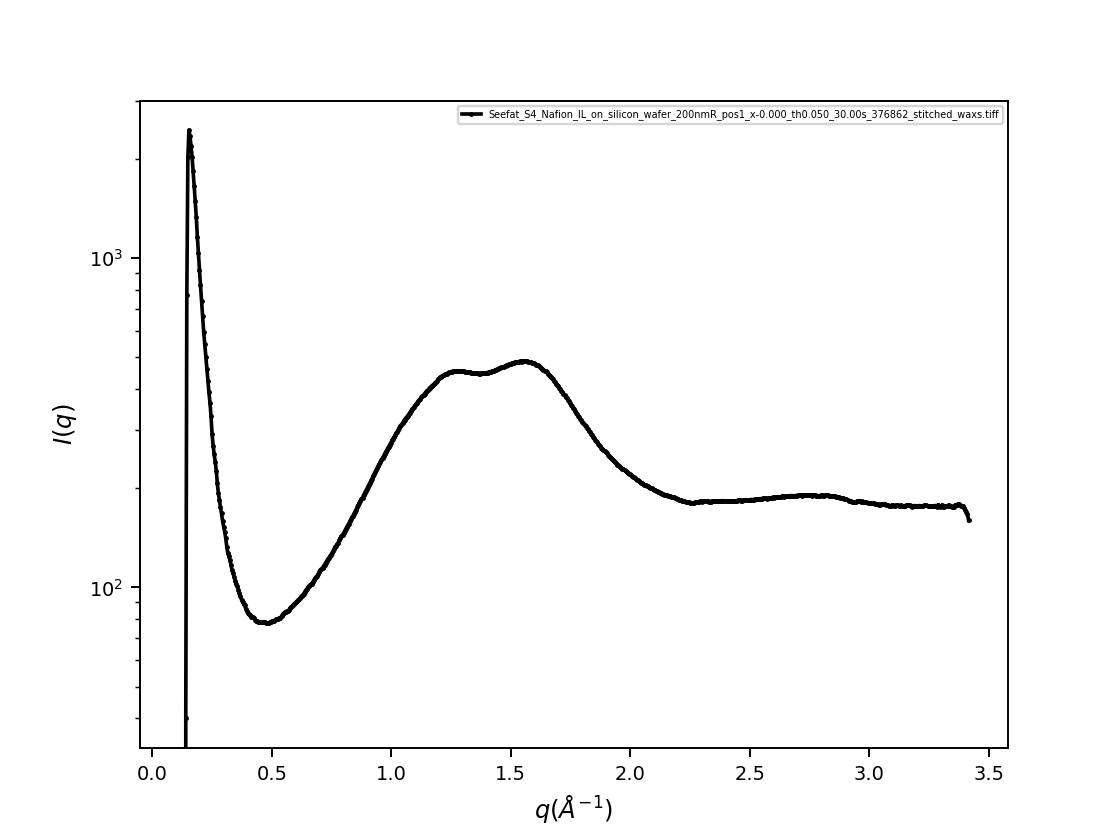

Text(0.5, 1.0, '')

In [10]:
fig, ax= plt.subplots() 
i = 0
d = D['giwaxs']
plot1D( x = d[i]['q'], y = d[i]['iq'], ax=ax,m=markers[i], ls='-', c=colors[i], 
       markersize = 1, logy=True, logx=False, legend= d[i]['s'], legend_size=4  ) 
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel( r'$I(q) $')
#ax.set_xlim( [0.005, 0.12])
#ax.set_ylim( [450, 20e3] )
ax.set_title( '', fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

## Plot 2D image

In [11]:
sam  ='Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[   'giwaxs', 'giwqimg' , 'giwqphi' ] )  
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
dict_keys(['giwaxs', 'giwqimg', 'giwqphi'])


### plot the q-img

<IPython.core.display.Javascript object>


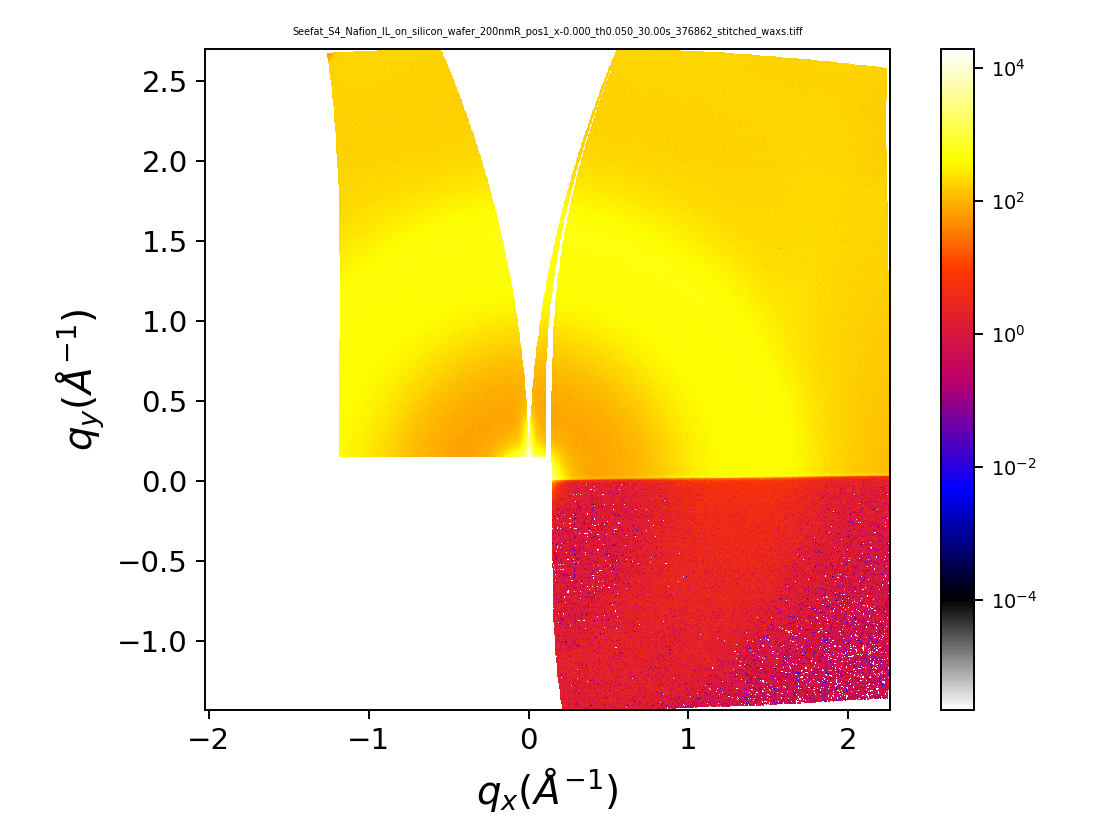

In [12]:
fig, ax= plt.subplots() 
i=0
img = D['giwqimg']
tdxlabel=  r'$q_x (\AA^{-1})$' 
tdylabel=  r'$q_y (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

### plot the q-phi  if avaible

<IPython.core.display.Javascript object>


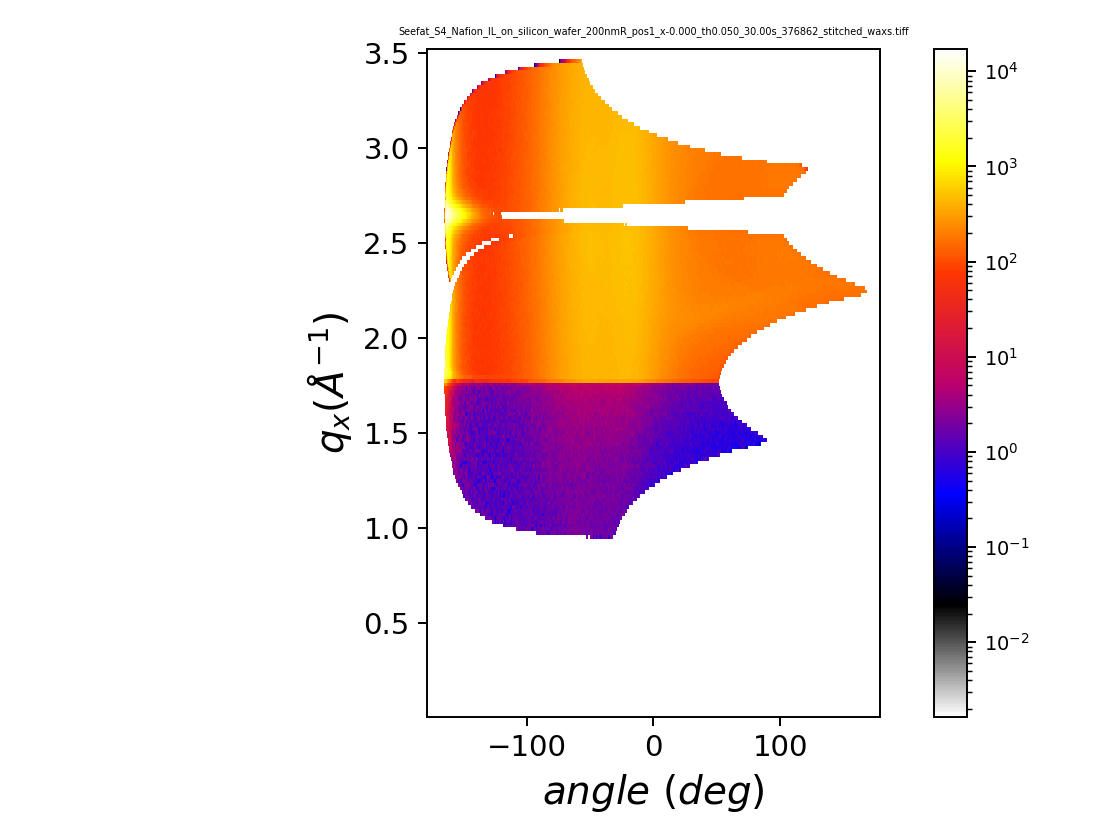

In [13]:
fig, ax= plt.subplots() 
i=0
img = D['giwqphi']
tdxlabel= r'$angle\ (deg)$'
tdylabel=  r'$q_x (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=150, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

### plot the gisaxs qr-qz

In [14]:
sam  ='Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
There is no such key=gisaxs in this dataset.
dict_keys(['gisqimg'])


<IPython.core.display.Javascript object>


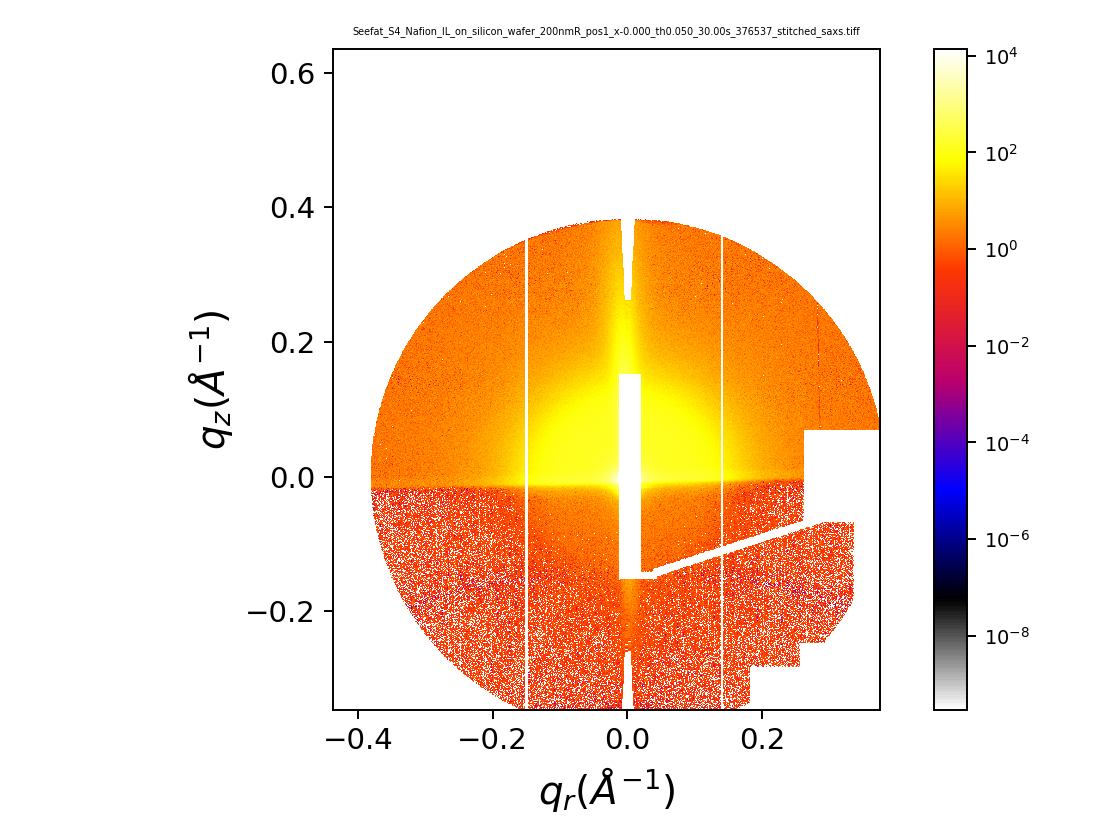

In [15]:
fig, ax= plt.subplots() 
i=0
img = D['gisqimg']
tdxlabel=  r'$q_r (\AA^{-1})$' 
tdylabel=  r'$q_z (\AA^{-1})$' 
show_img( img[i]['img'],  extent=[img[i]['qr'][0], img[i]['qr'][-1], img[i]['qz'][0], img[i]['qz'][-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

# Do analysis

## linecuts for gisaxs data if applicable

In [16]:
sam  ='Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
There is no such key=gisaxs in this dataset.
dict_keys(['gisqimg'])


### Do a horizontal line cut  

In [17]:
qz_range_cut =[ 0.05, 0.055 ] #define the vertical range of the line cut

In [18]:
img = D['gisqimg']

i=0
qr = D['gisqimg'][i]['qr']
qz = D['gisqimg'][i]['qz']
qimg_mask = ~(img[i]['img']==0)
qr_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]

qr_1d, iqr_1d = get_Iq_from_QPhi(img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

/home/group/Software/pyScatt/pyScatt/generic_functions.py:974: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


#### Save the linecut-curve

In [19]:
save_lists( data=[qr_1d, iqr_1d ], label=['qr_1d', 'iqr_1d'], 
           filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

##Load the saved CSV file
# load_data = pds.read_csv(  outDir + 'test.csv' )
# print(load_data)
# x = load_data['qr_1d']
# y = load_data['iqr_1d']

The data was saved in: /home/group/NSLSII_Data/CMS/2022_Cycle1/Results/SDishari/PostAnalys/test.csv.


## plot the image with the line-cut

<IPython.core.display.Javascript object>


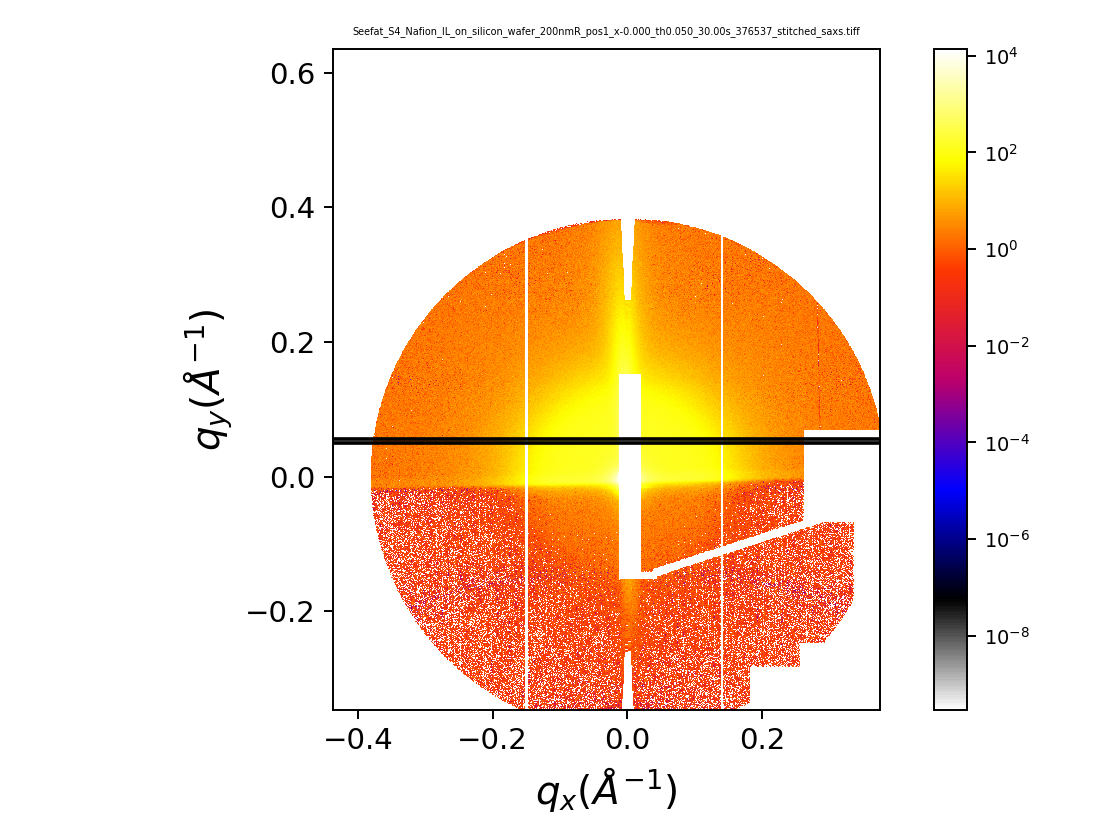

<IPython.core.display.Javascript object>


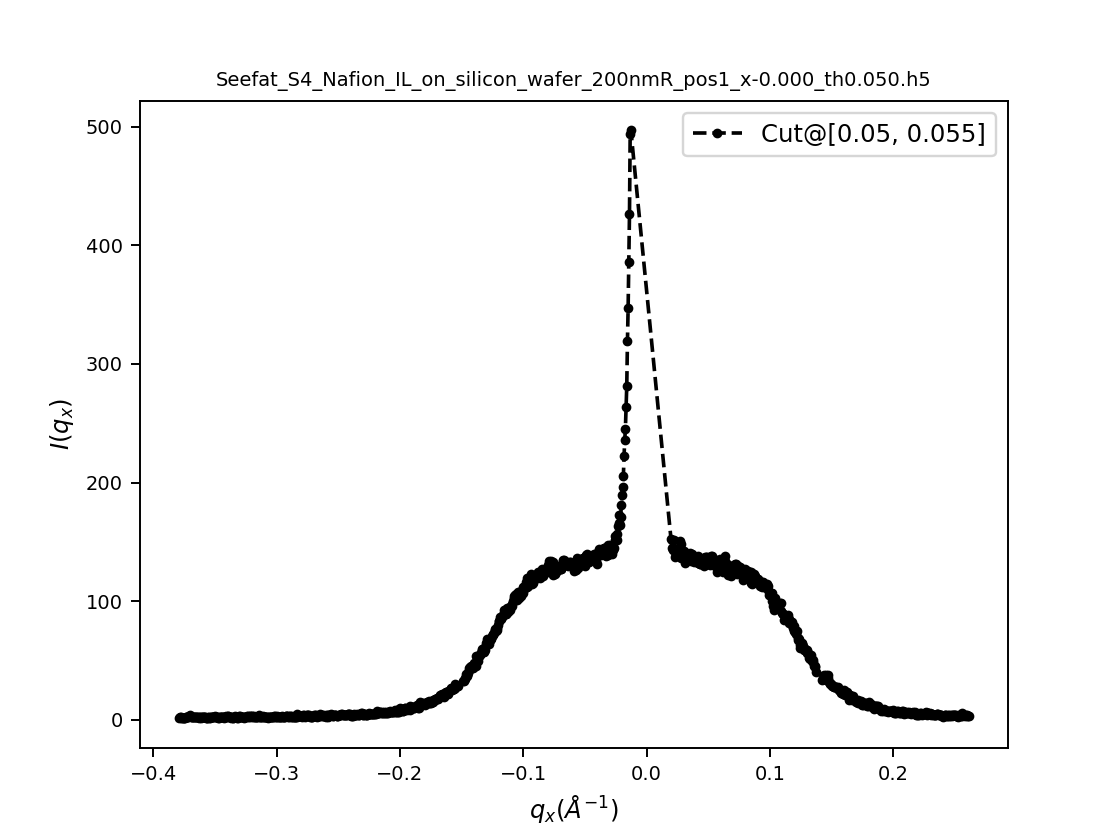

Text(0.5, 1.0, 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5')

In [20]:
fig, ax= plt.subplots() 
i=0
tdxlabel=  r'$q_x (\AA^{-1})$' 
tdylabel=  r'$q_y (\AA^{-1})$' 
show_img( img[i]['img'],   extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
   logs=True,  aspect=1.0, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
ax.hlines( qz_range_cut, qr[0], qr[-1], color='k')
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

fig, ax= plt.subplots()
plot1D( x = qr_1d, y = iqr_1d, ax=ax, m='o', ls='--', c='k', markersize = 3, legend='Cut@%s'% qz_range_cut )
ax.set_xlabel( r'$q_x (\AA^{-1})$')
ax.set_ylabel( r'$I(q_x) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

### Do a vertical line cut  

In [21]:
sam  ='Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5'
#for waxs 900 image data, return a dict, giwaxs to retreive cir-avg curve, giwqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'gisaxs', 'gisqimg' ] ) 
print( D.keys() )
#print(D)

The avaible keys are: dict_keys(['GISAXS', 'GIWAXS']).
There is no such key=gisaxs in this dataset.
dict_keys(['gisqimg'])


In [28]:
qr_range_cut =[ 0.05, 0.052 ] #define the vertical range of the line cut

In [29]:
img = D['gisqimg']

i=0
qr = D['gisqimg'][i]['qr']
qz = D['gisqimg'][i]['qz']
qimg_mask = ~(img[i]['img']==0)
qz_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]

 
qz_1d, iqz_1d, = get_Phi_from_QPhi( img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

/home/group/Software/pyScatt/pyScatt/generic_functions.py:974: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


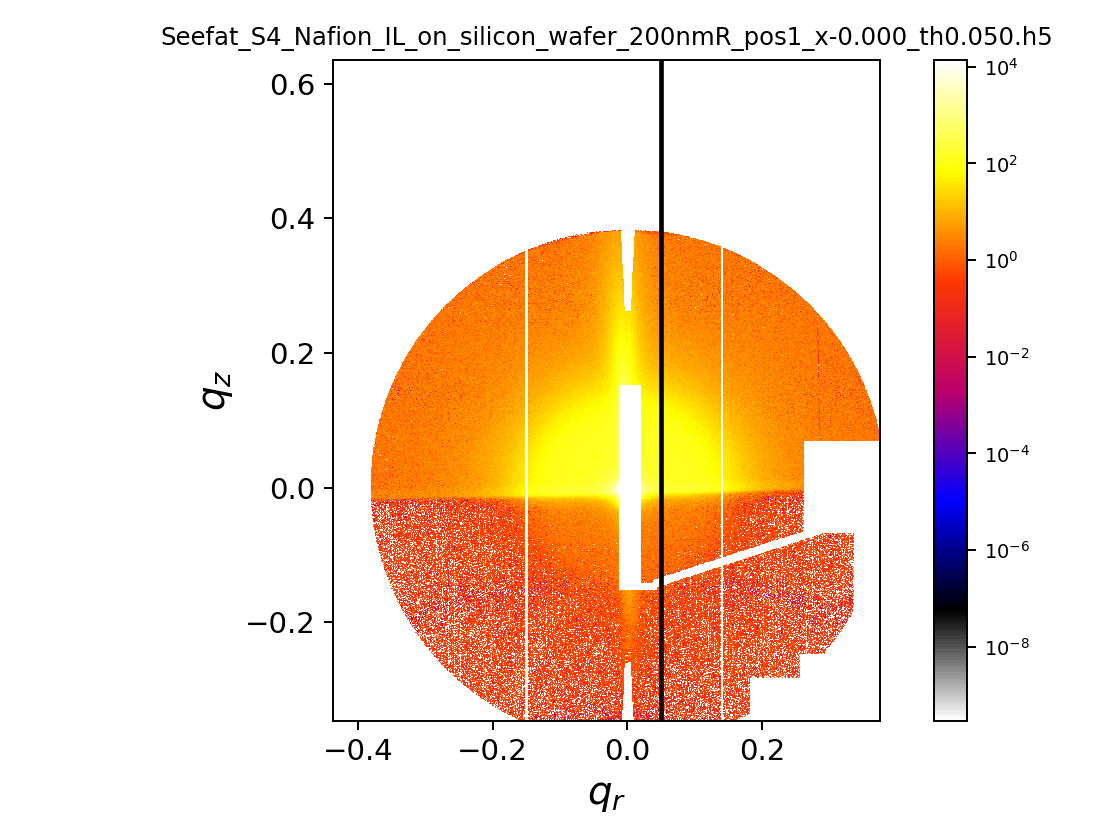

<IPython.core.display.Javascript object>


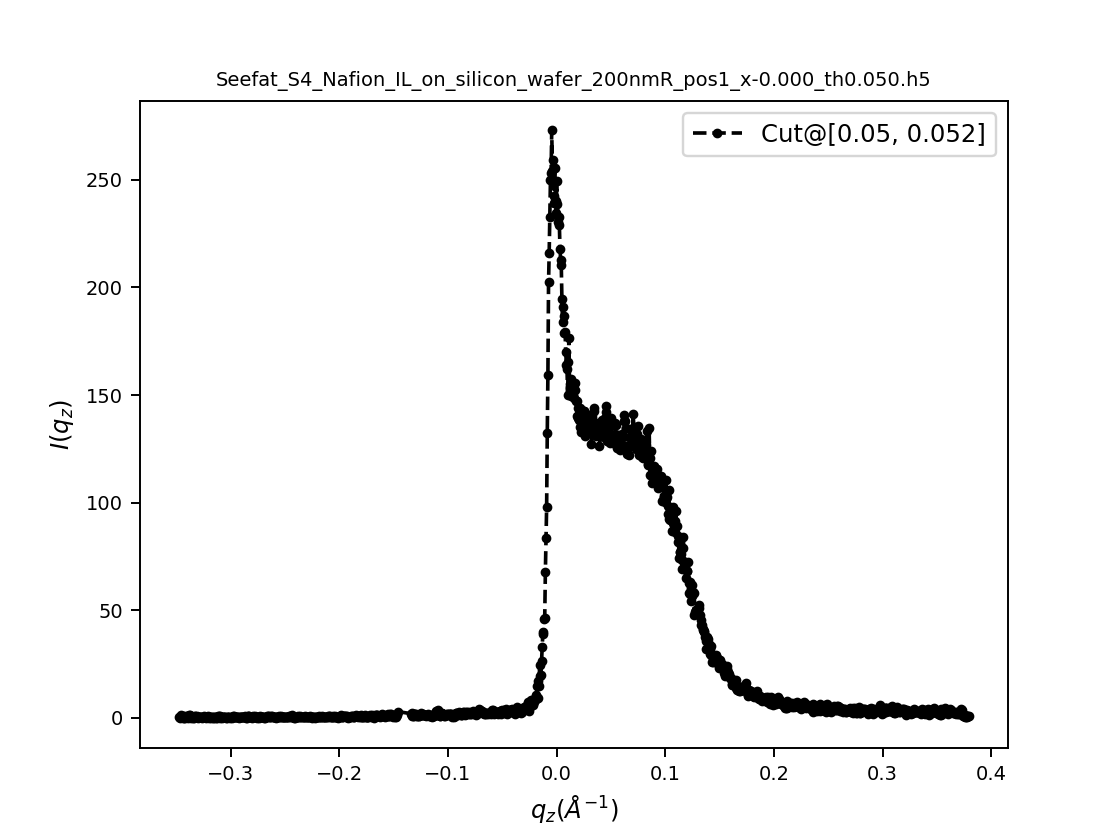

Text(0.5, 1.0, 'Seefat_S4_Nafion_IL_on_silicon_wafer_200nmR_pos1_x-0.000_th0.050.h5')

In [30]:
#save to csv file
#save_lists( data=[qz_1d, iqz_1d ], label=['qz_1d', 'iqz_1d'],   filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

fig, ax= plt.subplots()
show_img( img[i]['img'],  extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
       logs=True,  aspect=1.0, title_size=10,image_name= sam, xlabel= r'$q_r$',ylabel= r'$q_z$', ax=[fig,ax],
         zlim=[.3,1], cmap=cmap_vge_hdr, show_colorbar=True )
         #vmax= 10e4, vmin= 1.00, cmap=cmap_albula_r, show_colorbar=True )    
ax.vlines( qr_range_cut, qz[0], qz[-1], color='k')
plt.tight_layout()
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

fig, ax= plt.subplots()
plot1D( x = qz_1d, y = iqz_1d, ax=ax, m='o', ls='--', c='k', markersize = 3,   legend='Cut@%s'% qr_range_cut )
ax.set_xlabel( r'$q_z (\AA^{-1})$')
ax.set_ylabel( r'$I(q_z) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

## linecuts of q-phi map  for giwaxs data

In [ ]:
sam = 'Bar1s1_FAPbI3_x-0.000_th0.900_1.00s_374151_waxs.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs', 'giwqimg', 'giwqphi' ] ) 
print( D.keys() )
#print(D)

### Do a horizontal line cut  

In [ ]:
qz_range_cut =[ 45, 48] #define the vertical range of the line cut

In [ ]:
img = D['giwqphi']

i=0
qz = img[i]['qr']  #should be phi in qphi map
qr = img[i]['qz']   #should be q in qphi map
qimg_mask = ~(img[i]['img']==0)
qr_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]
print( qr_range, qz_range )
qr_1d, iqr_1d = get_Iq_from_QPhi(img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

#### Save the linecut-curve

In [ ]:
save_lists( data=[qr_1d, iqr_1d ], label=['qr_1d', 'iqr_1d'], 
           filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

In [ ]:
##Load the saved CSV file
# load_data = pds.read_csv(  outDir + 'test.csv' )
# print(load_data)
# x = load_data['qr_1d']
# y = load_data['iqr_1d']

## plot the image with the line-cut

In [ ]:
fig, ax= plt.subplots() 
i=0
tdylabel=  r'$angle\ (deg)$' 
tdxlabel=  r'$q (\AA^{-1})$' 
show_img( img[i]['img'],   extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
   logs=True,  aspect= .01, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
ax.hlines( qz_range_cut, qr[0], qr[-1], color='k')
plt.tight_layout()
#plt.savefig( outDir + 'test.png' )  #save the plot

In [ ]:
fig, ax= plt.subplots()
plot1D( x = qr_1d, y = iqr_1d, ax=ax, m='o', ls='--', c='k', 
       markersize = 3, legend='Cut@%s'% qz_range_cut )
ax.set_xlabel( r'$q$')
ax.set_ylabel( r'$I(q) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

### Do a vertical line cut  

In [ ]:
sam = 'Bar1s1_FAPbI3_x-0.000_th0.900_1.00s_374151_waxs.h5'
#for saxs image data, return a dict, waxs to retreive cir-avg curve, wqimg, retreive the q-image
D = _get_data(  sam, inDir, types=[    'giwaxs', 'giwqimg', 'giwqphi' ] ) 
print( D.keys() )
#print(D)

In [ ]:
qr_range_cut =[ .9,1.1 ] #define the vertical range of the line cut

In [ ]:
img = D['giwqphi']

i=0
qz = img[i]['qr']  #should be phi in qphi map
qr = img[i]['qz']   #should be q in qphi map
qimg_mask = ~(img[i]['img']==0)
qz_range_cut = None 
qr_range = [qr[0], qr[-1]] 
qz_range = [ qz[0], qz[-1]]
print( qr_range, qz_range )
 
qz_1d, iqz_1d, = get_Phi_from_QPhi( img[i]['img'], qr_range, qz_range, qmask=qimg_mask, Qrange= qr_range_cut, Prange=qz_range_cut)

In [ ]:
#save to csv file
#save_lists( data=[qz_1d, iqz_1d ], label=['qz_1d', 'iqz_1d'],   filename='test.csv', path=outDir, sep=',', verbose=True, return_res=False)

In [ ]:
fig, ax= plt.subplots() 
i=0
tdylabel=  r'$angle\ (deg)$' 
tdxlabel=  r'$q (\AA^{-1})$' 
show_img( img[i]['img'],   extent=[qr[0], qr[-1], qz[0], qz[-1]  ],
   logs=True,  aspect= .01, title_size=4,image_name=img[i]['s'], xlabel= tdxlabel,ylabel= tdylabel, 
         ax=[fig,ax],zlim=[.1,1], cmap=cmap_vge_hdr, show_colorbar=True  ) 
ax.vlines( qr_range_cut, qz[0], qz[-1], color='k')
plt.tight_layout()
 
#plt.savefig( outDir + 'test.png' )  #save the plot

In [ ]:
fig, ax= plt.subplots()
plot1D( x = qz_1d, y = iqz_1d, ax=ax, m='o', ls='--', c='k', markersize = 3,   legend='Cut@%s'% qr_range_cut )
ax.set_xlabel( r'$angle$')
ax.set_ylabel( r'$I(angle) $')
ax.set_title( sam, fontsize=8 )
#plt.savefig( outDir + 'test.png' )  #save the plot

## Create waterfall for time resolved curves

## find the interested filename list

In [ ]:
flist = ls_dir( inDir, and_list=[  ''    ], or_list=[], no_list=[   ])
print( len( flist ))
print( flist )

In [ ]:
flist = ls_dir( inDir, and_list=[  'Bar3_insitu' , '0.3'   ], or_list=[], no_list=[   ])
print( len( flist ))
print( flist )

## get the interested data

In [ ]:
Nstart = 10
Nend  = 100

fps =flist[ Nstart : Nend ] #test the first 20
Ntest = Nend - Nstart 
for i, sam in enumerate( fps ): 
    D = _get_data(  sam, inDir, types=[   'giwaxs'  ] )   
    qiq = D['giwaxs'][0]
    q =  qiq['q']
    iq  =  qiq['iq']
    if i==0:
        Iqiq = np.zeros( [ Ntest, len(q)  ])
    Iqiq[i] = iq


In [ ]:
show_img( Iqiq, logs=True, show_colorbar=True, 
        extent = [  q[0], q[-1], Nstart,  Nend ], 
         vmin=50, vmax=200, #cmap= cmap_albula_r,
         xlabel= r'$q$',  ylabel= r'$time $', save=True, image_name='test', path=outDir
        
        )

# The END!